In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
df = pd.read_csv('/content/MyDrive/MyDrive/code_states/section3/naver_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19,36,57,62,63,64,67,68,69,70,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df['item_name'].value_counts()

ASUS E510MA-BQ160 SSD 500GB 주식용 인강용 노트북           53
MSI GE62 6QF Apache Pro 15.6인치 게이밍노트북             51
IT 삼성전자 노트북5 NT550EAA-K24                         50
[유광/고화질/무결점]삼성노트북액정교환 NT630Z5J-X0A/R 노트북패널 새제품    50
[유광/고화질/무결점]삼성노트북액정교환 NT630Z5J-X0B/R 노트북패널 새제품    50
                                                  ..
레노버 씽크패드 E14-20T6S04Y00                            1
DELL 인스피론 15 5510 DN5510-WH02KR                    1
레노버 아이디어패드 SLIM3-15ARE R3 WIN10                    1
레노버 씽크패드 L13 YOGA G2-20VK0025KD                    1
[중고]삼성노트북액정교체 Samsung NT500R5H-K33B 노트북패널 당일발송     1
Name: item_name, Length: 7637, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10034 entries, 0 to 10033
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  10034 non-null  object 
 1   item_name            10034 non-null  object 
 2   price                10034 non-null  object 
 3   screen_size          3133 non-null   object 
 4   weight               4871 non-null   object 
 5   type                 4856 non-null   object 
 6   release_OS           4880 non-null   object 
 7   CPU                  4976 non-null   object 
 8   chipset              5020 non-null   object 
 9   core_type            4963 non-null   object 
 10  code_name            4755 non-null   object 
 11  CPU_speed            4500 non-null   object 
 12  turbo_boost          4222 non-null   object 
 13  RAM                  5029 non-null   object 
 14  memory_type          4847 non-null   object 
 15  AMD_GPU              692 non-null   

In [ ]:
df.dtypes

_id             object
item_name       object
price           object
screen_size     object
weight          object
                ...   
connector       object
color_exp       object
mobile          object
design          object
volume         float64
Length: 74, dtype: object

# EDA 시작

In [ ]:
# _id 행 제거
df = pd.read_csv('/content/MyDrive/MyDrive/code_states/section3/naver_data.csv')
df = df.drop(columns=['_id'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19,36,57,62,63,64,67,68,69,70,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# 가격 column 치환

def trans_won(data):
    rslt = data.replace('원','')
    rslt_final = rslt.replace(',','')
    return int(rslt_final)

df['price'] = df['price'].apply(trans_won)

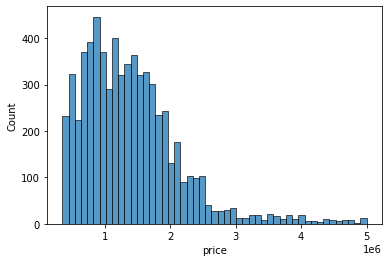

In [ ]:
# 이상치를 제거한 그래프 확인

condition = (df['price'] > 350000) & (df['price'] < 5000000)
sns.histplot(data = df.loc[condition, 'price'])

In [ ]:
# 이상치 제거

condition = (df['price'] > 350000) & (df['price'] < 5000000)
df = df[condition]

In [ ]:
df.head()

,item_name,price,screen_size,weight,type,release_OS,CPU,chipset,core_type,code_name,...,wireless_connection,TGP,low_power,turbo_core,eUFS,connector,color_exp,mobile,design,volume
0,주연테크 리오나인 젠 L8CS37,1849000,43.94cm(17.3인치),2.5kg,라이젠7-4세대,미포함(FreeDos),라이젠7-5800H,AMD,옥타코어,세잔,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HP OMEN 16-b1033TX,2499000,40.89cm(16.1인치),2.3kg,코어i7 12세대,윈도우11 홈,코어i7-12700H,인텔,14코어(6P+8E),엘더레이크,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HP Victus 16-d1141TX,1599000,40.89cm(16.1인치),2.46kg,코어i7 12세대,미포함(FreeDos),코어i7-12700H,인텔,12코어(4P+8E),엘더레이크,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,삼성전자 노트북 플러스2 NT550XDA-K14A,522000,39.62cm(15.6인치),1.81kg,셀러론,윈도우11 프로,셀러론-6305,인텔,듀얼코어,타이거레이크,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,삼성전자 노트북 플러스2 NT550XDA-K24A,589000,39.62cm(15.6인치),1.81kg,펜티엄,윈도우11 프로,펜티엄-7505,인텔,NaN,타이거레이크,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 주요 요인 column 추출

new_col = ['item_name','price','screen_size','weight','release_OS','CPU','chipset','CPU_speed','RAM','resolution','video_output','SSD']
df = df[new_col]

In [ ]:
df.dtypes

item_name       object
price            int64
screen_size     object
weight          object
release_OS      object
CPU             object
chipset         object
CPU_speed       object
RAM             object
resolution      object
video_output    object
SSD             object
dtype: object

In [ ]:
df_origin = df.copy()
df.head()

,item_name,price,screen_size,weight,release_OS,CPU,chipset,CPU_speed,RAM,resolution,video_output,SSD
0,주연테크 리오나인 젠 L8CS37,1849000,43.94cm(17.3인치),2.5kg,미포함(FreeDos),라이젠7-5800H,AMD,3.2GHz,16GB,1920x1080(FHD),miniDisplayPort,512GB
1,HP OMEN 16-b1033TX,2499000,40.89cm(16.1인치),2.3kg,윈도우11 홈,코어i7-12700H,인텔,NaN,16GB,2560x1440(QHD),miniDisplayPort,1TB
2,HP Victus 16-d1141TX,1599000,40.89cm(16.1인치),2.46kg,미포함(FreeDos),코어i7-12700H,인텔,NaN,16GB,1920x1080(FHD),HDMI 2.1,256GB
3,삼성전자 노트북 플러스2 NT550XDA-K14A,522000,39.62cm(15.6인치),1.81kg,윈도우11 프로,셀러론-6305,인텔,1.8GHz,4GB,1920x1080(FHD),HDMI,128GB
4,삼성전자 노트북 플러스2 NT550XDA-K24A,589000,39.62cm(15.6인치),1.81kg,윈도우11 프로,펜티엄-7505,인텔,2.0GHz,4GB,1920x1080(FHD),HDMI,128GB


In [ ]:
# size 바꿔주기

def chng_size(data):
    if type(data) == str:
        data = data.split('(')[1].split('인치')[0]
    else: pass
    return float(data)

df['screen_size'] = df['screen_size'].apply(chng_size)
df.rename(columns = {'screen_size':'screen_size-inch'}, inplace = True)

In [ ]:
# CPU column 재정의

def chng_CPU(data):
    if type(data) == str:
        data = data.split('-')[0]
        return data

df['CPU'] = df['CPU'].apply(chng_CPU)

In [ ]:
# cpu speed column 재정의

def chng_speed(data):
    if type(data) == str:
        data = data.replace(' 이하','')
        data = data.replace(' 이상','')
        data = data.split('GHz')[0]
        return float(data)

df['CPU_speed'] = df['CPU_speed'].apply(chng_speed)
df.rename(columns = {'CPU_speed':'CPU_speed-GHz'}, inplace = True)

In [ ]:
# ram column 재정의

def chng_ram(data):
    if type(data) == str:
        data = data.split('GB')[0]
        return int(data)

df['RAM'] = df['RAM'].apply(chng_ram)
df.rename(columns = {'RAM':'RAM-GB'}, inplace = True)

In [ ]:
# resolution column 재정의

def chng_resolution(data):
    if type(data) == str:
        data = data.split('(')[0]
        return data

df['resolution'] = df['resolution'].apply(chng_resolution)

In [ ]:
# ssd column 재정의

def chng_SSD(data):
    if type(data) == str:
        if 'GB' in data:
            data = float(data.split('GB')[0])
        elif 'TB' in data:
            data = float(data.split('TB')[0])*1000
        return data

df['SSD'] = df['SSD'].apply(chng_SSD)
df.rename(columns = {'SSD':'SSD-GB'}, inplace = True)

In [ ]:
# weight column 재정의

def chng_weight(data):
    if type(data) == str:
        if '0.' in data:
            data = '0'
        elif '1.' in data:
            data = '1'
        elif '2.' in data:
            data = '2'
        elif '3.' in data:
            data = '3'
        elif '4.' in data:
            data = '4'
        else:
            pass

        if '2kg' in data:
            data = '2'
        elif '1kg' in data:
            data = '1'
        elif '3kg' in data:
            data = '3'
        elif ',' in data:
            data = '1'
        else:
            pass

        if '1190g' in data:
            data = '1'
        elif '1120g' in data:
            data = '1'
        elif '1350g' in data:
            data = '1'
        elif '1199gg' in data:
            data = '1'
        elif '1099g' in data:
            data = '1'
        elif '1700g' in data:
            data = '1'
        elif '1190' in data:
            data = '1'
        elif '1400' in data:
            data = '1'

        if 'g' in data:
            data = '0'

        return data

df['weight-kg'] = df['weight'].apply(chng_weight)

In [ ]:
df.head(5)

,item_name,price,screen_size-inch,weight,release_OS,CPU,chipset,CPU_speed-GHz,RAM-GB,resolution,video_output,SSD-GB,weight-kg
0,주연테크 리오나인 젠 L8CS37,1849000,17.3,2.5kg,미포함(FreeDos),라이젠7,AMD,3.2,16.0,1920x1080,miniDisplayPort,512.0,2
1,HP OMEN 16-b1033TX,2499000,16.1,2.3kg,윈도우11 홈,코어i7,인텔,NaN,16.0,2560x1440,miniDisplayPort,1000.0,2
2,HP Victus 16-d1141TX,1599000,16.1,2.46kg,미포함(FreeDos),코어i7,인텔,NaN,16.0,1920x1080,HDMI 2.1,256.0,2
3,삼성전자 노트북 플러스2 NT550XDA-K14A,522000,15.6,1.81kg,윈도우11 프로,셀러론,인텔,1.8,4.0,1920x1080,HDMI,128.0,1
4,삼성전자 노트북 플러스2 NT550XDA-K24A,589000,15.6,1.81kg,윈도우11 프로,펜티엄,인텔,2.0,4.0,1920x1080,HDMI,128.0,1


In [ ]:
df.dtypes

item_name            object
price                 int64
screen_size-inch    float64
weight               object
release_OS           object
CPU                  object
chipset              object
CPU_speed-GHz       float64
RAM-GB              float64
resolution           object
video_output         object
SSD-GB              float64
weight-kg            object
dtype: object

# 모델 학습

In [ ]:
df_model = df.drop(columns=['item_name','weight'])

In [ ]:
df_model.dtypes

price                 int64
screen_size-inch    float64
release_OS           object
CPU                  object
chipset              object
CPU_speed-GHz       float64
RAM-GB              float64
resolution           object
video_output         object
SSD-GB              float64
weight-kg            object
dtype: object

In [ ]:
df_model.columns

Index(['price', 'screen_size-inch', 'release_OS', 'CPU', 'chipset',
       'CPU_speed-GHz', 'RAM-GB', 'resolution', 'video_output', 'SSD-GB',
       'weight-kg'],
      dtype='object')

In [ ]:
df_model.head()

,price,screen_size-inch,release_OS,CPU,chipset,CPU_speed-GHz,RAM-GB,resolution,video_output,SSD-GB,weight-kg
0,1849000,17.3,미포함(FreeDos),라이젠7,AMD,3.2,16.0,1920x1080,miniDisplayPort,512.0,2
1,2499000,16.1,윈도우11 홈,코어i7,인텔,NaN,16.0,2560x1440,miniDisplayPort,1000.0,2
2,1599000,16.1,미포함(FreeDos),코어i7,인텔,NaN,16.0,1920x1080,HDMI 2.1,256.0,2
3,522000,15.6,윈도우11 프로,셀러론,인텔,1.8,4.0,1920x1080,HDMI,128.0,1
4,589000,15.6,윈도우11 프로,펜티엄,인텔,2.0,4.0,1920x1080,HDMI,128.0,1


In [ ]:
# 결측값 처리

df_model['screen_size-inch'] = df_model['screen_size-inch'].fillna(df_model['screen_size-inch'].mean())
df_model['CPU_speed-GHz'] = df_model['CPU_speed-GHz'].fillna(df_model['CPU_speed-GHz'].mean())

In [ ]:
# !pip install category_encoders

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# data split
train, val = train_test_split(df_model, test_size=0.2, random_state=2)

X_train = train.drop(columns=['price'])
y_train = train['price']
X_val = val.drop(columns=['price'])
y_val = val['price']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# pipeline 정의

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='most_frequent'), 
    StandardScaler(), 
    SelectKBest(f_regression, k=20),
    XGBRegressor(
    n_estimators=1000,
    learning_rate=0.2,
    n_jobs=-1
        )
    )

In [ ]:
pipe.fit(X_train, y_train)

[04:52:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['release_OS', 'CPU', 'chipset',
                                     'resolution', 'video_output',
                                     'weight-kg'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_regression at 0x7fd32e10ab90>)),
                ('xgbregressor',
                 XGBRegressor(learning_rate=0.2, n_estimators=1000,
                              n_jobs=-1))])

In [ ]:
import pickle

with open('pipe.pkl','wb') as pickle_file:
    pickle.dump(pipe, pickle_file)